# Reading the dataset

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [133]:
df = pd.read_csv('../datasets/titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
df.drop(['Name', 'Ticket'], axis='columns', inplace=True)

In [136]:
from sklearn.preprocessing import LabelEncoder

for c in df.select_dtypes(include=['object']):
    df[c] = LabelEncoder().fit_transform(df[c])

In [137]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Correlation matrix

In [138]:
df.corr() \
    .style.background_gradient(cmap='coolwarm') \
    .format(precision = 2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.00,-0.01,-0.04,0.04,0.03,-0.06,-0.00,0.01,-0.04,0.01
Survived,-0.01,1.00,-0.34,-0.54,-0.07,-0.04,0.08,0.26,-0.25,-0.16
Pclass,-0.04,-0.34,1.00,0.13,-0.33,0.08,0.02,-0.55,0.68,0.16
Sex,0.04,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,0.10,0.10
Age,0.03,-0.07,-0.33,0.08,1.00,-0.23,-0.18,0.09,-0.24,-0.02
SibSp,-0.06,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,0.04,0.07
Parch,-0.00,0.08,0.02,-0.25,-0.18,0.41,1.00,0.22,-0.03,0.04
Fare,0.01,0.26,-0.55,-0.18,0.09,0.16,0.22,1.00,-0.50,-0.22
Cabin,-0.04,-0.25,0.68,0.10,-0.24,0.04,-0.03,-0.50,1.00,0.19
Embarked,0.01,-0.16,0.16,0.10,-0.02,0.07,0.04,-0.22,0.19,1.00


# Machine learning

## Common operations

In [139]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

### Preparing the comparison table

In [140]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)

### Drawing ROC

In [141]:
def drawROC(model, X_test, y_test):
    pred = model.predict(X_test)
    metrics.RocCurveDisplay.from_predictions(y_test, pred)
    plt.show()

### Executing a given algorithm

In [142]:
def execute_ml(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy_score  = metrics.accuracy_score(y_test,pred)
    precision_score = metrics.precision_score(y_test, pred)
    recall_score = metrics.recall_score(y_test, pred)
    f1_score = metrics.f1_score(y_test,pred)
    evaluation_df.loc[len(evaluation_df.index)] = [type(model).__name__,accuracy_score,precision_score,recall_score, f1_score]    
    
    print(metrics.classification_report(y_test,pred))
        
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
    plt.show()
    
    return model

### Cross validation

In [143]:
from sklearn.model_selection import cross_validate

def perform_cross_validation(model, X_train, y_train):
    cross_validation_result = cross_validate(model,
                                             X_train, y_train,
                                             return_train_score=True)

    return cross_validation_result

### Tweaking threshold

Instead of using the predefined <i>predict</i>, the function is customized to use the given threshold.

In [144]:
def execute_using_threshold(model, X_train, y_train, t):
    model.fit(X_train,y_train)
    pred_prob = model.predict_proba(X_test)
    pred = [1 if pred_prob[i][1]> t else 0 for i in range(len(pred_prob))]
    
    print("Threshold: %f" %t)
    print(metrics.classification_report(y_test,pred))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred)
    plt.show()

## Specifying the independent and target features

In [145]:
X = df.drop(['Survived'], axis='columns')
y = df['Survived']

## Splitting the dataset into training and testing subsets
<br>
<b>random_state</b> simply initializes the randomizer and can be any number
<br>
<b>test_size</b> and <b>train_size</b> are fractions of the whole dataset

In [146]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12, train_size=.8)

## Machine learning algorithms

### K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       110
           1       0.57      0.25      0.34        69

    accuracy                           0.64       179
   macro avg       0.61      0.56      0.55       179
weighted avg       0.62      0.64      0.59       179



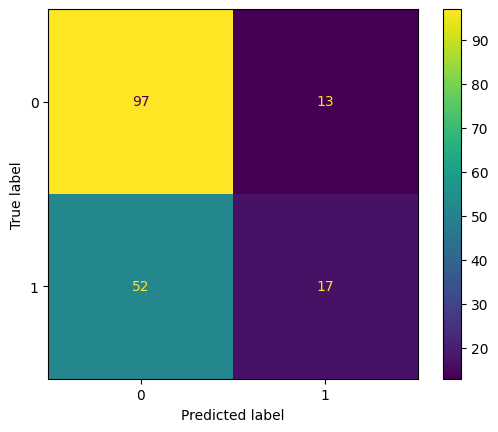

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [147]:
from sklearn.neighbors import KNeighborsClassifier

execute_ml(KNeighborsClassifier(n_neighbors = 15, weights='distance'),
           X_train, y_train, X_test, y_test)

### Logistic regression

C:\Users\Babak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



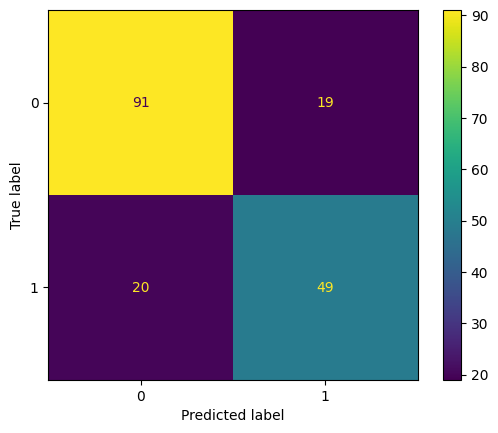

LogisticRegression(max_iter=200, random_state=12)

In [148]:
from sklearn.linear_model import LogisticRegression

execute_ml(LogisticRegression(max_iter=200,random_state=12),
           X_train, y_train, X_test, y_test)

### Logistic regression CV

C:\Users\Babak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Babak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



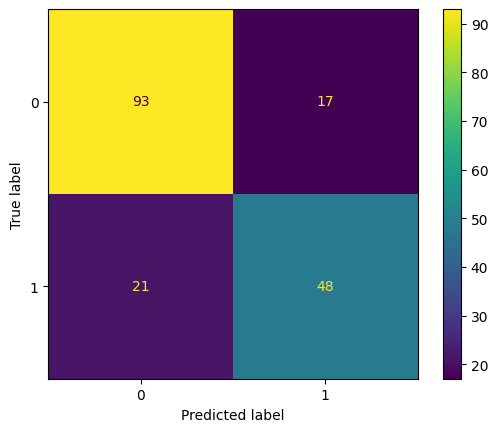

LogisticRegressionCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=12),
                     max_iter=200, random_state=12, scoring='roc_auc', tol=10)

In [149]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold

execute_ml(LogisticRegressionCV(max_iter=200,penalty='l2',
                                scoring='roc_auc',
                                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=12),
                                tol=10,random_state=12),
           X_train, y_train, X_test, y_test)

### Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       110
           1       0.69      0.72      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



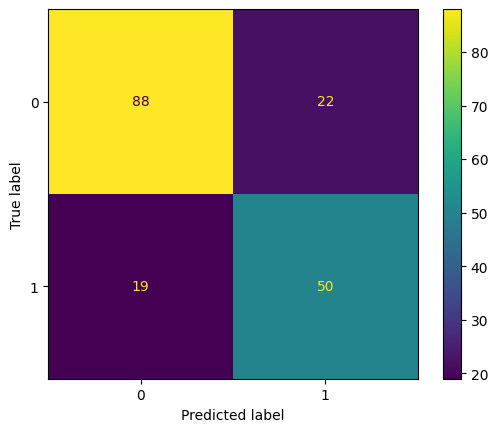

BernoulliNB(alpha=1)

In [150]:
from sklearn.naive_bayes import BernoulliNB

execute_ml(BernoulliNB(alpha=1),
           X_train, y_train, X_test, y_test)

### Random forest

#### Random forest + gini

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



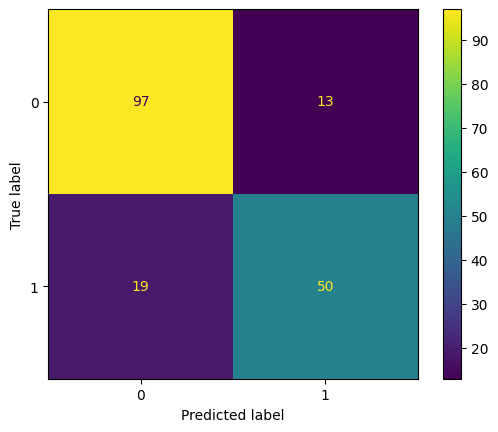

RandomForestClassifier(random_state=12)

In [151]:
from sklearn.ensemble import RandomForestClassifier

execute_ml(RandomForestClassifier(bootstrap = True,
                                  max_features = 'sqrt',
                                  random_state=12),
           X_train, y_train, X_test, y_test)

#### Random forest + entropy

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



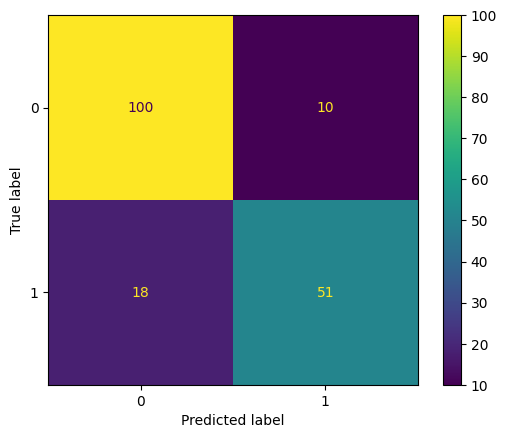

RandomForestClassifier(criterion='entropy', random_state=12)

In [152]:
from sklearn.ensemble import RandomForestClassifier

execute_ml(RandomForestClassifier(bootstrap = True,
                                  criterion='entropy',
                                  max_features = 'sqrt',
                                  random_state=12),
           X_train, y_train, X_test, y_test)

### Gradient Boosting classifier

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



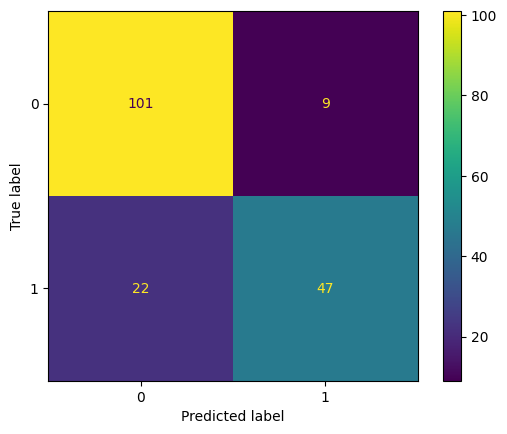

GradientBoostingClassifier()

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

execute_ml(GradientBoostingClassifier(),
           X_train, y_train, X_test, y_test)

### AdaBoost classifier

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



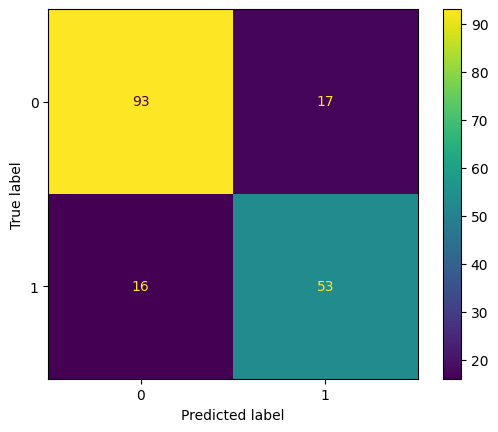

AdaBoostClassifier(n_estimators=200, random_state=12)

In [154]:
from sklearn.ensemble import AdaBoostClassifier

execute_ml(AdaBoostClassifier(n_estimators=200, random_state=12),
           X_train, y_train, X_test, y_test)

### XGBoost classifier

[15:05:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



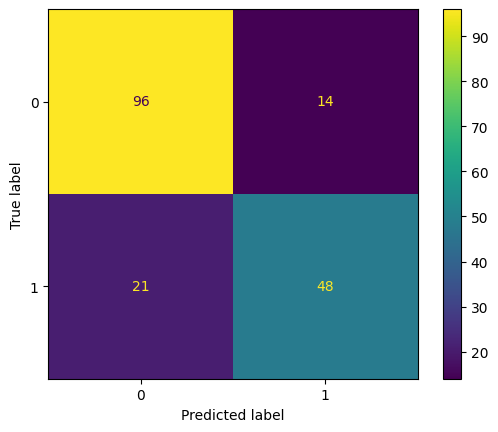

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=12),
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [155]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

execute_ml(XGBClassifier(cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=12),
                         learning_rate=0.01),
           X_train, y_train, X_test, y_test)

### HistGradientBoost classifier

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



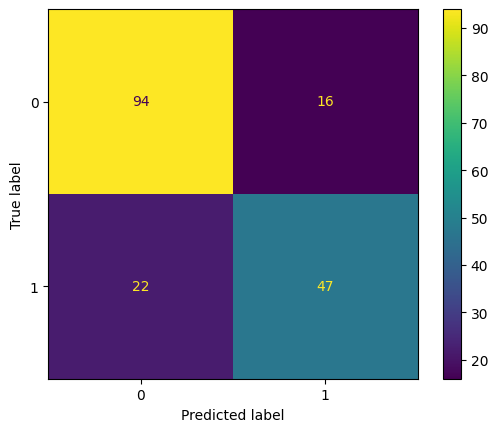

HistGradientBoostingClassifier()

In [156]:
from sklearn.ensemble import HistGradientBoostingClassifier

execute_ml(HistGradientBoostingClassifier(),
           X_train, y_train, X_test, y_test)

### LightGBM classifier

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



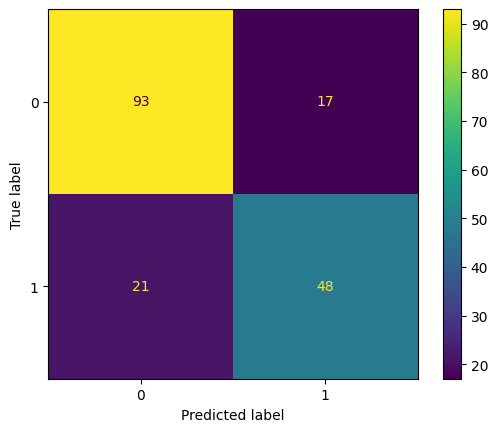

LGBMClassifier()

In [157]:
from lightgbm import LGBMClassifier

execute_ml(LGBMClassifier(),
           X_train, y_train, X_test, y_test)

### CatBoost classifier

C:\Users\Babak\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.008911
0:	learn: 0.6866724	total: 2.61ms	remaining: 2.6s
1:	learn: 0.6806610	total: 4.33ms	remaining: 2.16s
2:	learn: 0.6750358	total: 6.03ms	remaining: 2s
3:	learn: 0.6694004	total: 7.76ms	remaining: 1.93s
4:	learn: 0.6634055	total: 9.5ms	remaining: 1.89s
5:	learn: 0.6579198	total: 11.2ms	remaining: 1.86s
6:	learn: 0.6529751	total: 12.9ms	remaining: 1.83s
7:	learn: 0.6481077	total: 14.8ms	remaining: 1.83s
8:	learn: 0.6443866	total: 16.5ms	remaining: 1.82s
9:	learn: 0.6394508	total: 18.3ms	remaining: 1.81s
10:	learn: 0.6347931	total: 20.2ms	remaining: 1.82s
11:	learn: 0.6297719	total: 22.3ms	remaining: 1.84s
12:	learn: 0.6247967	total: 24.2ms	remaining: 1.83s
13:	learn: 0.6203597	total: 25.7ms	remaining: 1.81s
14:	learn: 0.6164149	total: 27.3ms	remaining: 1.79s
15:	learn: 0.6118850	total: 28.8ms	remaining: 1.77s
16:	learn: 0.6072660	total: 30.5ms	remaining: 1.76s
17:	learn: 0.6035924	total: 32.1ms	remaining: 1.75s
18:	learn: 0.5996983	total: 33.6ms	remaining: 1.7

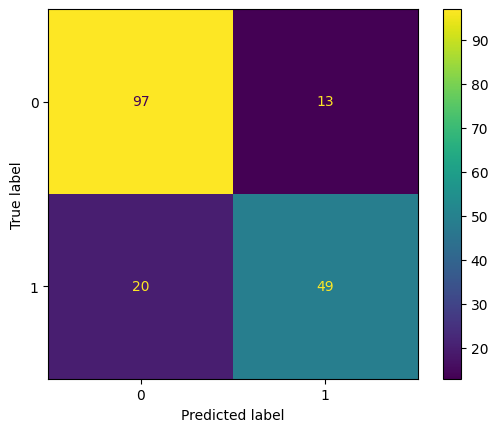

In [158]:
from catboost import CatBoostClassifier

execute_ml(CatBoostClassifier(),
           X_train, y_train, X_test, y_test)

### Support Vector Machine classifier

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       110
           1       0.64      0.23      0.34        69

    accuracy                           0.65       179
   macro avg       0.65      0.58      0.55       179
weighted avg       0.65      0.65      0.60       179



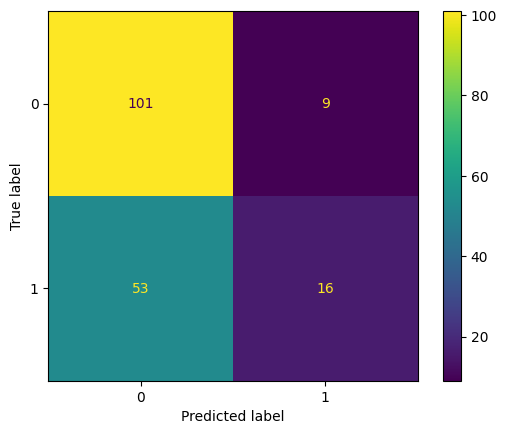

SVC(random_state=12)

In [159]:
from sklearn import svm

execute_ml(svm.SVC(probability=False, random_state=12),
           X_train, y_train, X_test, y_test)

### Bagging classifier

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



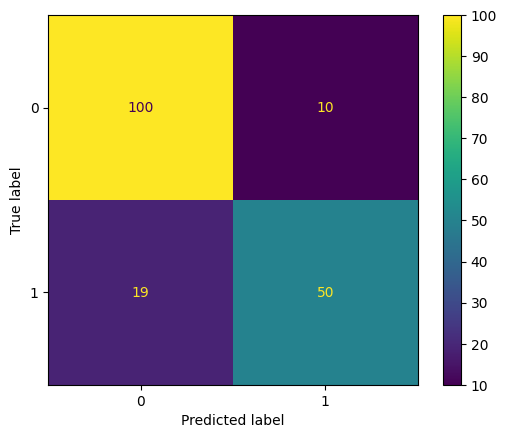

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=200, oob_score=True,
                  random_state=12)

In [160]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

execute_ml(BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=200,
                             max_samples=0.8,
                             max_features=0.8,
                             oob_score=True,
                             random_state=12),
           X_train, y_train, X_test, y_test)

### Multilayer perceptron

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       110
           1       0.70      0.83      0.75        69

    accuracy                           0.79       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.79      0.80       179



C:\Users\Babak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


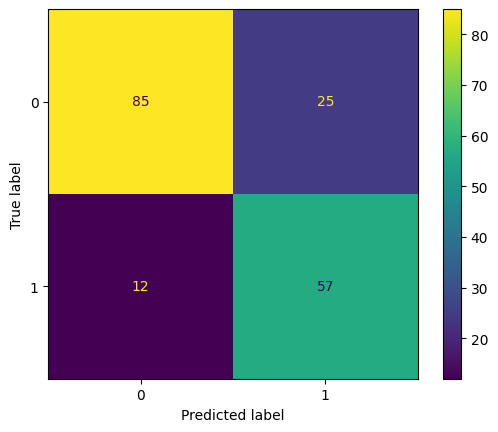

MLPClassifier(activation='logistic', random_state=12)

In [161]:
from sklearn.neural_network import MLPClassifier

execute_ml(MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', random_state=12),
           X_train, y_train, X_test, y_test)

## Evaluation

In [162]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,KNeighborsClassifier,0.636872,0.566667,0.246377,0.343434
1,LogisticRegression,0.782123,0.720588,0.710145,0.715328
2,LogisticRegressionCV,0.787709,0.738462,0.695652,0.716418
3,BernoulliNB,0.770950,0.694444,0.724638,0.709220
4,RandomForestClassifier,0.821229,0.793651,0.724638,0.757576
5,RandomForestClassifier,0.843575,0.836066,0.739130,0.784615
6,GradientBoostingClassifier,0.826816,0.839286,0.681159,0.752000
7,AdaBoostClassifier,0.815642,0.757143,0.768116,0.762590
8,XGBClassifier,0.804469,0.774194,0.695652,0.732824
9,HistGradientBoostingClassifier,0.787709,0.746032,0.681159,0.712121


## Overfit analysis using cross validation

Cross validating the training VS testing performance using the selected model. If the measurements are not that far apart means that there is not a considerable overfit.

In [163]:
from sklearn.ensemble import RandomForestClassifier

perform_cross_validation(
    RandomForestClassifier(bootstrap = True,
                           criterion='entropy',
                           verbose=1,
                           oob_score=True,
                           max_features = 'sqrt',
                           random_state=12),
    X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'fit_time': array([0.2387681 , 0.27867055, 0.2823627 , 0.24655318, 0.21589994]),
 'score_time': array([0.00610113, 0.01900625, 0.01600075, 0.01562715, 0.0156424 ]),
 'test_score': array([0.83916084, 0.8041958 , 0.80985915, 0.84507042, 0.78873239]),
 'train_score': array([1., 1., 1., 1., 1.])}

## Threshold tweaking

Checking the performance agaist different thresholds (extracted from the ROC curve) in order to find and optimum with regards to the case study (Whether it is more important to classify Positives or Negatives)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



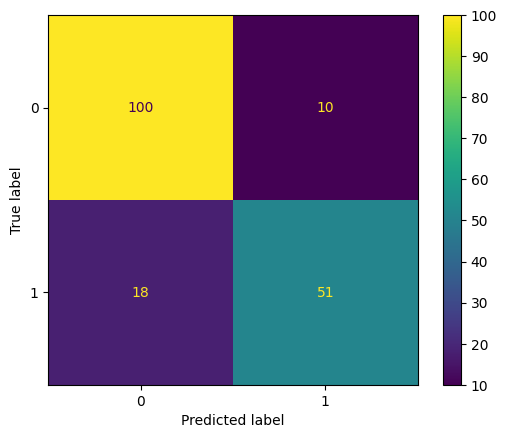

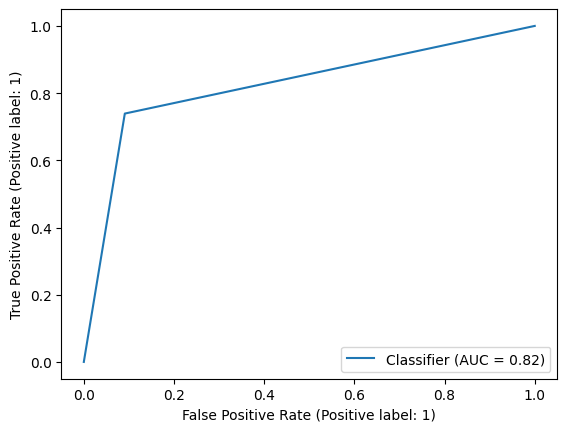

Threshold: 0.100000
              precision    recall  f1-score   support

           0       0.89      0.36      0.52       110
           1       0.48      0.93      0.63        69

    accuracy                           0.58       179
   macro avg       0.68      0.65      0.57       179
weighted avg       0.73      0.58      0.56       179



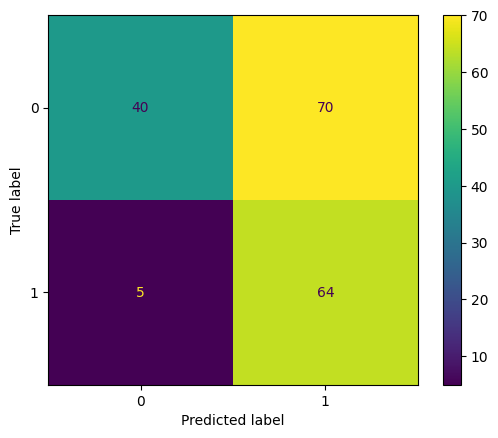

Threshold: 0.300000
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       110
           1       0.68      0.88      0.77        69

    accuracy                           0.79       179
   macro avg       0.79      0.81      0.79       179
weighted avg       0.82      0.79      0.80       179



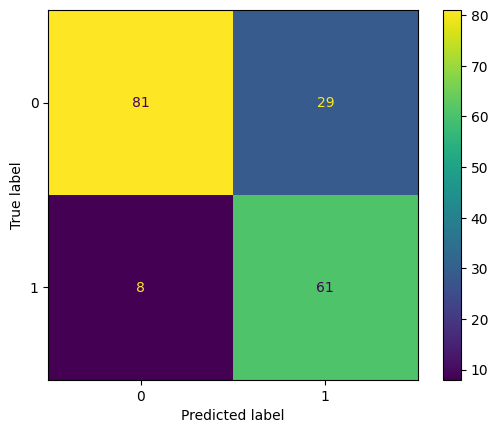

Threshold: 0.500000
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



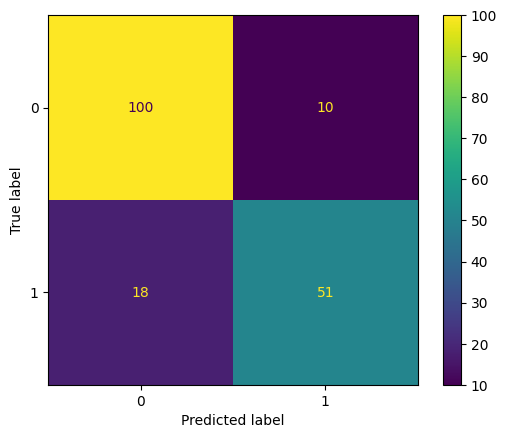

Threshold: 0.700000
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       110
           1       0.89      0.58      0.70        69

    accuracy                           0.81       179
   macro avg       0.84      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



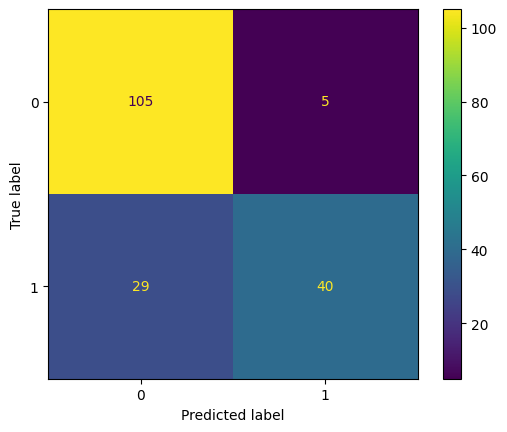

Threshold: 0.900000
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       110
           1       0.90      0.26      0.40        69

    accuracy                           0.70       179
   macro avg       0.79      0.62      0.60       179
weighted avg       0.76      0.70      0.65       179



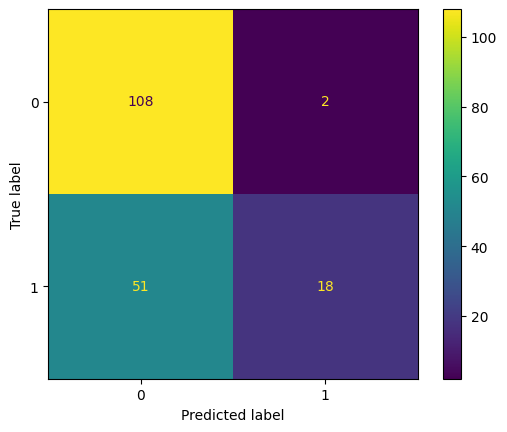

In [164]:
from sklearn.ensemble import RandomForestClassifier

model = execute_ml(RandomForestClassifier(bootstrap = True,
                                  criterion='entropy',
                                  max_features = 'sqrt',
                                  random_state=12),
                   X_train, y_train, X_test, y_test)

drawROC(model, X_test, y_test)

for i in np.arange(0.1,1,0.2):
    execute_using_threshold(
        RandomForestClassifier(bootstrap = True,
                               criterion='entropy',
                               max_features = 'sqrt',
                               random_state=12),
        X_train, y_train,
        i)